### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

***

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read IMDB Dataset

In [2]:
df=pd.read_csv('IMDB Dataset.csv')[0:1000]

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### View descriptive stats

In [6]:
df.describe()

,review,sentiment
count,1000,1000
unique,1000,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,501


### Check for imbalanced data

In [7]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [9]:
a=len(df[df['sentiment']=='positive'])
b=len(df[df['sentiment']=='negative'])

In [10]:
c=[a,b]

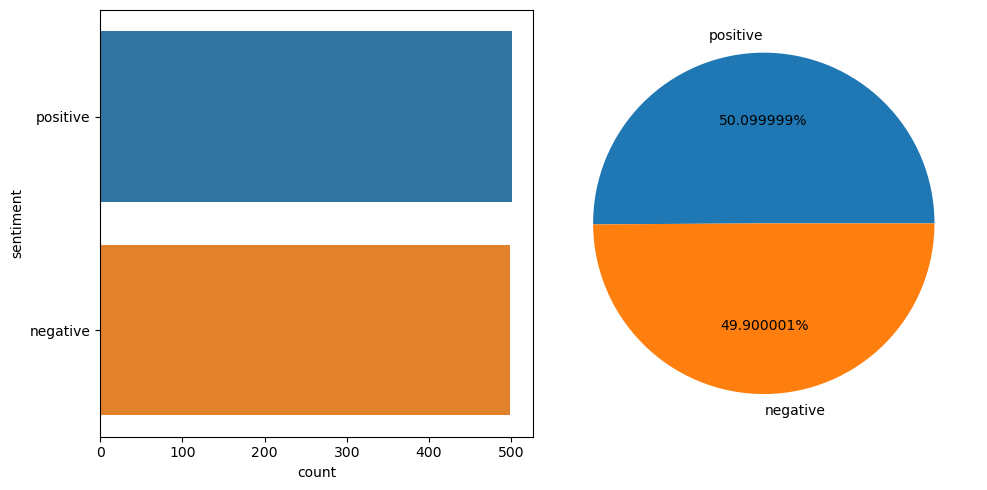

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(y=df['sentiment'])
plt.subplot(1,2,2)
plt.pie(c,labels=['positive','negative'],autopct='%1f%%')
plt.tight_layout()
plt.show()

### Create a function to Preprocess the review column

In [11]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [14]:
def preprocess(sent):
    txt=re.sub(r"[^a-zA-Z0-9]",' ',sent).split()
    txt=[i.lower() for i in txt if i not in stopwords.words('english')]
    lemma=WordNetLemmatizer()
    txt=[lemma.lemmatize(word,'v') for word in txt]
    txt=' '.join(txt)
    return txt

In [15]:
df['review']=df['review'].apply(preprocess)

### Print some text after applying the function

In [17]:
for i in range(5):
    print(df['review'][i])
    print()

one reviewers mention watch 1 oz episode hook they right exactly happen br br the first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid this show pull punch regard drug sex violence its hardcore classic use word br br it call oz nickname give oswald maximum security state penitentary it focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away br br i would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around the first episode i ever saw strike nasty surreal i say i ready i watch i develop taste oz get accustom high level graphic violence not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due l

### Split the dataset into Input (X) & Target (y) variable

In [33]:
X=df['review']
y=df['sentiment']

In [34]:
X

0      one reviewers mention watch 1 oz episode hook ...
1      a wonderful little production br br the film t...
2      i think wonderful way spend time hot summer we...
3      basically family little boy jake think zombie ...
4      petter mattei love time money visually stun fi...
                             ...                        
995    nothing sacred just ask ernie fosselius these ...
996    i hat i hate self aware pretentious inanity ma...
997    i usually try professional constructive i crit...
998    if like go see film history class something li...
999    this like zoology textbook give depiction anim...
Name: review, Length: 1000, dtype: object

In [35]:
y

0      positive
1      positive
2      positive
3      negative
4      positive
         ...   
995    positive
996    negative
997    negative
998    negative
999    negative
Name: sentiment, Length: 1000, dtype: object

### Convert y variable values into 0 and 1 from positive and negative

In [36]:
def new(x):
    if x=='positive':
        return 0
    else:
        return 1

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [37]:
y = y.apply(new)

In [38]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: sentiment, Length: 1000, dtype: int64

In [32]:
type(y[0])

numpy.ndarray

In [15]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: sentiment, Length: 1000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [20]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [33]:
from keras.models import Sequential
from keras.layers import Dense


In [26]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
tokenizer=Tokenizer(num_words=5000)

In [40]:
tokenizer.fit_on_texts(X)

In [41]:
vocab_size=len(tokenizer.word_index)+1

In [42]:
def enco(t):
    en=tokenizer.texts_to_sequences(t)
    p=pad_sequences(en,maxlen=128)
    return p

In [44]:
X = enco(X)

In [32]:
X

0      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
                             ...                        
995    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
996    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
997    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
998    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
999    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: review, Length: 1000, dtype: object

### Split the dataset into Training & Testing set

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Create keras Sequential Model with LSTM Layers

In [47]:
from keras import Sequential
from keras import layers

In [48]:
model=Sequential([
    layers.Embedding(vocab_size,128),
    layers.LSTM(128,return_sequences=True),
    layers.Dropout(0.02),
    layers.LSTM(128),
    layers.Dropout(0.02),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.02),
    layers.Dense(1,activation='sigmoid')
])

### Compile the model

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the model with our training set

In [50]:
model.fit(X_train,y_train,epochs=10,validation_split=0.02)

Epoch 1/10


25/25 [==============================] - 17s 358ms/step - loss: 0.6906 - accuracy: 0.5421 - val_loss: 0.7041 - val_accuracy: 0.4375
Epoch 2/10
25/25 [==============================] - 6s 241ms/step - loss: 0.3759 - accuracy: 0.8329 - val_loss: 0.5145 - val_accuracy: 0.7500
Epoch 3/10
25/25 [==============================] - 6s 253ms/step - loss: 0.0781 - accuracy: 0.9745 - val_loss: 0.7883 - val_accuracy: 0.7500
Epoch 4/10
25/25 [==============================] - 6s 255ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 1.2070 - val_accuracy: 0.7500
Epoch 5/10
25/25 [==============================] - 6s 223ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4813 - val_accuracy: 0.6250
Epoch 6/10
25/25 [==============================] - 6s 254ms/step - loss: 0.0090 - accuracy: 0.9962 - val_loss: 1.5540 - val_accuracy: 0.5625
Epoch 7/10
25/25 [==============================] - 6s 232ms/step - loss: 3.4594e-04 - accuracy: 1.0000 - val_loss: 1.3553 - val_accuracy: 0.7500

### Make prediction with X_test

In [51]:
y_pred=model.predict(X_test)

7/7 [==============================] - 2s 74ms/step


In [53]:
y_pred[0]

array([0.99984324], dtype=float32)

### Convert to 0 and 1 with higher probability towards 1

In [56]:
pred=[]
for i in y_pred:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)

### Evaluate the model

In [57]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 2s 84ms/step - loss: 0.0343 - accuracy: 0.9937


[0.034270986914634705, 0.9937499761581421]

### Check accuracy score

In [58]:
from sklearn import metrics

In [61]:
y_pred=[np.argmax(i) for i in pred]

In [62]:
print(metrics.accuracy_score(y_test,y_pred))

0.485


### Check confusion matrix

<Axes: >

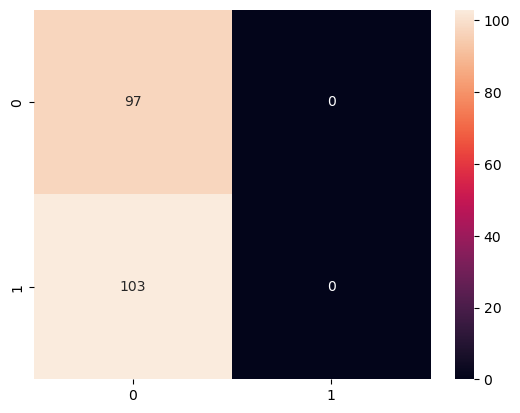

In [64]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Print Classification report

In [65]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        97
           1       0.00      0.00      0.00       103

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.33       200
weighted avg       0.24      0.48      0.32       200



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***